** 3.3 CartPoleの状態を離散化してみる **

# 使用するパッケージの宣言

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

# 定数の設定

In [2]:
ENV = 'CartPole-v0'  # 使用する課題名

In [4]:
NUM_DIZITIZED = 6  # 各状態の離散値への分割数

# CartPoleを実行してみる

## 実行する課題を設定

In [5]:
env = gym.make(ENV)  # 実行する課題を設定

環境は4変数で表される。p81にあるようにこの4変数は以下に対応する

- カート位置（-2.4から2.4)
- カート速度（-Inf to Inf)
- 棒の角度 (-41.8 to 41.8)
- 棒の角速度(-Inf to Inf)

## 環境初期化

env.resetは

```
Resets the state of the environment and returns an initial observation.
```

鉛直に近いところからスタートするような気がする・・・

In [23]:
observation = env.reset()  # 環境の初期化

In [25]:
observation

array([ 0.00476037,  0.00861799, -0.01428923, -0.00481115])

## 離散化の閾値を求める

観測した状態（連続値）を離散値にデジタル変換する閾値を求める

具体的にはmin, maxの間をNUM_DIZITIZED等分し、右端と左端を除いたNUM_DIZITIZED-1個のarrayを返す

In [26]:
def bins(clip_min, clip_max, num):
    '''観測した状態（連続値）を離散値にデジタル変換する閾値を求める'''
    return np.linspace(start = clip_min, stop = clip_max, num = num + 1)[1:-1]

In [30]:
NUM_DIZITIZED

6

In [31]:
bins(-2.4,2.4 ,NUM_DIZITIZED)

array([-1.6, -0.8,  0. ,  0.8,  1.6])

In [32]:
np.linspace(-2.4, 2.4, 6 + 1)

array([-2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4])

In [ ]:
np.linspace(-2.4, 2.4, 6 + 1)[1:-1]

## 観測したobservation状態を、離散値に変換する

4つの離散値（NUM_DIZITIZEDが６ならそれぞれ6値）が得られるので、6進数的にコーディングする

In [28]:
def digitize_state(observation):
    '''観測したobservation状態を、離散値に変換する'''
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
        np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
        np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
        np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]
    return sum([x * (NUM_DIZITIZED**i) for i, x in enumerate(digitized)])


In [ ]:
digitize_state(observation)

# 色々試してみる

## actionは右にちょっと動かすか左にちょっと動かすかの二択？

In [33]:
env.action_space

Discrete(2)

具体的には0,1の二値

In [46]:
env.action_space.sample()

0

## env.stepでワンステップ進む

In [ ]:
env.step(0)

In [ ]:
env.step(1)

## rendering　（オブジェクト指向に書いた。お勧め）

In [47]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [48]:
ax = fig.add_subplot("111")

ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [49]:
ax.imshow(env.render(mode = 'rgb_array'))

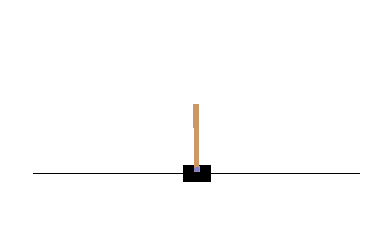

In [50]:
fig

## rendering explained in non-object oriented manner (非推奨）
explained [here](https://gist.github.com/andrewschreiber/e9a21bba9c604a790e605fbacd3f4109)

In [ ]:
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))

In [ ]:
env.render()

## randomに動かしながら静止画を表示してみよう

In [51]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [52]:
ax = fig.add_subplot("111")

ax.axis('off')


(0.0, 1.0, 0.0, 1.0)

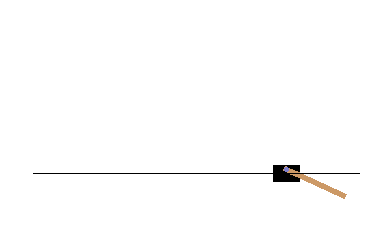

In [63]:
for i in range(10):
    env.step(env.action_space.sample())
ax.imshow(env.render(mode = 'rgb_array'))

fig

# sandbox

In [ ]:
%%bash
git commit -a -m "leaving starbucks"

In [ ]:
cart_pos, cart_v, pole_angle, pole_v = observation
digitized = [
    np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)),
    np.digitize(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITIZED)),
    np.digitize(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITIZED)),
    np.digitize(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITIZED))]

In [ ]:
cart_pos

In [ ]:
bins(-2.4, 2.4, NUM_DIZITIZED)

In [ ]:
np.array([1,1]).shape

In [ ]:
np.array([4,3,2]).shape

In [ ]:
type(np.array([4,3,2]))

In [ ]:
np.ndarray([4,3,2]).shape

In [ ]:
type(np.ndarray([4,3,2]))

In [ ]:
(np.digitize(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITIZED)))

In [ ]:
?np.linspace

In [ ]:
np.linspace(

In [ ]:
bins(-2,2,5)

In [ ]:
observation

In [ ]:
?np.digitize

In [ ]:
np.digitize(3 , 3)

In [ ]:
%%bash
git commit -a -m "leaving 3_3"